# Unsupervised Learning in Python

Run the hidden code cell below to import the data used in this course.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats 

grains = pd.read_csv('datasets/grains.csv')
fish = pd.read_csv('datasets/fish.csv', header=None)
wine = pd.read_csv('datasets/wine.csv')
eurovision = pd.read_csv('datasets/eurovision-2016.csv')
stocks = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
digits = pd.read_csv('datasets/lcd-digits.csv', header=None)

## Take Notes

Cross-Tabulation
Elbow rule for choosing the number  of clusters

_Add your notes here_

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- You work for an agricultural research center. Your manager wants you to group seed varieties based on different measurements contained in the `grains` DataFrame. They also want to know how your clustering solution compares to the seed types listed in the dataset (the `variety_number` and `variety` columns). Try to use all of the relevant techniques you learned in Unsupervised Learning in Python!
- In the `fish` DataFrame, each row represents an individual fish. Standardize the features and cluster the fish by their measurements. You can then compare your cluster labels with the actual fish species (first column).
- In the `wine` DataFrame, there are three `class_labels` in this dataset. Transform the features to get the most accurate clustering.
- In the `eurovision` DataFrame, perform hierarchical clustering of the voting countries using `complete` linkage and plot the resulting dendrogram.

# Visualizing Data
- Hierarchial clustering
- t-SNE
Agglomerative clustering(seperate clusters merge into one)


,0,1,2,3,4,5,6,variety_number,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama wheat
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Canadian wheat


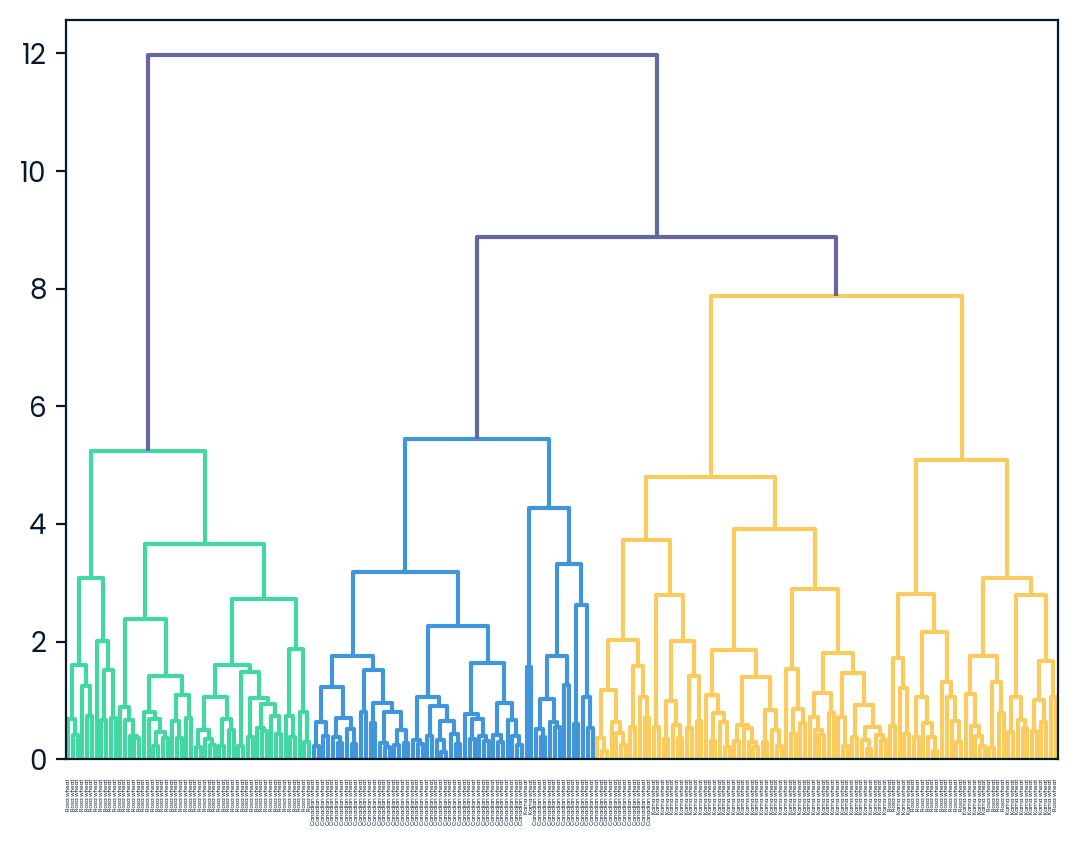

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import numpy as np
import sklearn
import scipy.stats 

grains = pd.read_csv('datasets/grains.csv')
fish = pd.read_csv('datasets/fish.csv', header=None)
wine = pd.read_csv('datasets/wine.csv')
eurovision = pd.read_csv('datasets/eurovision-2016.csv')
stocks = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
digits = pd.read_csv('datasets/lcd-digits.csv', header=None)
display(grains)
samples = grains.drop('variety', axis = 1).values
variety = grains['variety'].values
merging = linkage(samples, method ='complete')
dendrogram (merging, labels =variety,
            leaf_rotation =90,
            leaf_font_size =2
           ) 

plt.show()

# Cluster labels in hierarchical clustering


In [ ]:
samples = grains.drop('variety', axis = 1).values
variety = grains['variety'].values
merging = linkage(samples, method ='complete')

from scipy.cluster.hierarchy import fcluster
labels = fcluster(merging, 15, criterion = 'distance' )
pairs = pd.DataFrame({'labels': labels, 'variety' : variety})
print(pairs.sort_values)

<bound method DataFrame.sort_values of      labels         variety
0         1      Kama wheat
1         1      Kama wheat
2         1      Kama wheat
3         1      Kama wheat
4         1      Kama wheat
..      ...             ...
205       1  Canadian wheat
206       1  Canadian wheat
207       1  Canadian wheat
208       1  Canadian wheat
209       1  Canadian wheat

[210 rows x 2 columns]>


In [ ]:
# Import pandas
import pandas as pd

# Assuming 'model' and 'pipeline' are already defined and 'samples' and 'species' are available

# Fit the model to samples
model.fit(samples)

# Predict the labels using the model
lab = model.predict(samples)

# Ensure 'lab' and 'species' are of the same length
if len(lab) == len(species):
    # Create a DataFrame with labels and species as columns: df
    df = pd.DataFrame({'labels' : lab, 'species': species})

    # Create crosstab: ct
    ct = pd.crosstab(df['labels'], df['species'])

    # Display ct
    print(ct)
else:
    print("Error: 'lab' and 'species' arrays are not of the same length")

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Ensure 'labels' and 'species' are of the same length
if len(labels) == len(species):
    # Create a DataFrame with labels and species as columns: df
    df = pd.DataFrame({'labels' : labels, 'species': species})

    # Create crosstab: ct
    ct = pd.crosstab(df['labels'], df['species'])

    # Display ct
    print(ct)
else:
    print("Error: 'labels' and 'species' arrays are not of the same length")

ValueError: All arrays must be of the same length

# Visualizing the PCA Transformation
## Principle Component Analysis
1) Decorrelation
2) Dimension Reduction

## Decorrelation
 Features are usually correlated.
Shifts the mean of the samples to zero and aligns them to 0 
Due to the rotation it decorrelates the data
Linear correlation is evaluated with an interval of [-1, 1]
No correlation is 0

PCA aligns the  principle components(direction in which the samples vary the most) with the axis
Rows of the transformed sample correspond to the 
In the components array each row is a transformed sample and each column is a "PCA feature",  original features corresponded to columns of the original array.

In [ ]:
from sklearn.decomposition import PCA

model = PCA()
model.fit(samples)
transformed_data = model.transform(samples)

In [ ]:
import matplotlib.pyplot  as plt
from scipy.stats import pearsonr


width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width,length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features =model.fit_transform(grains)
print(grains)
print('\n')

print(pca_features)
# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)